In [9]:
import pandas as pd
import numpy as np
import sklearn

In [6]:
df = pd.read_csv('train.csv')
df

,num,date_time,y,t,w,h,r,s,cooling,sun_e
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [8]:
test = pd.read_csv('test.csv')
test

,num,date_time,t,w,h,r,s,cooling,sun_e
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
list(lm.coef_)

[77.17185341299275,
 123.83219978982862,
 5.83200533238396,
 -0.7326914116808713,
 324.87834726243193,
 615.9264385347312,
 447.6803405173727]

In [22]:
df.max()

num                     60
date_time    2020-08-24 23
y                17739.225
t                     36.3
w                     20.1
h                    100.0
r                     81.5
s                      1.0
cooling                1.0
sun_e                  1.0
dtype: object

In [23]:
df.min()

num                      1
date_time    2020-06-01 00
y                      0.0
t                     11.1
w                      0.0
h                     19.0
r                      0.0
s                      0.0
cooling                0.0
sun_e                  0.0
dtype: object

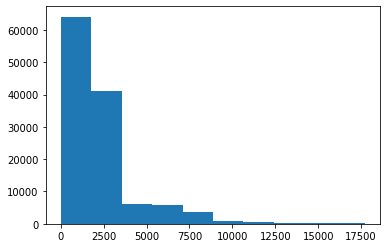

In [26]:
import matplotlib.pyplot as plt

# 타겟 값 분포
plt.hist(df['y'])
plt.show()


In [28]:
np.mean(df.y), np.median(df.y)

(2324.830865868444, 1700.352)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

X = df[['t','w','h','r','s','cooling','sun_e']]
Y = df['y']/5000


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=321)

lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

print('mean_squared_errors: {}'.format(mean_squared_error(Y_test, y_pred)))
print('explained_variance_score: {}'.format(explained_variance_score(Y_test, y_pred)))

mean_squared_errors: 0.1555813191589602
explained_variance_score: 0.07103192747875176
